## Observations and Insights 

# Observations
Based on the Summary Statistics, both Capomulin and Ramicane have the lowest average tumor volume compared to the rest of the drug treatments and can infer these two are more effective. This is also supported by the bar graphs where Capomulin and Ramicane have higher timepoints compared to the other treatments. Looking at the scatter plot, we can also see there is a positive correlation between the weight of the mouse and the average tumor volume for the mice treated with Capomulin.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_merge=pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")
# Display the data table for preview
data_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count=data_merge["Mouse ID"].nunique()
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse= data_merge.loc[data_merge.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mouse


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=data_merge[data_merge['Mouse ID'].isin(dup_mouse)==False]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count=clean_data["Mouse ID"].nunique()
clean_mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).mean()
median = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).median()
variance = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).var()
standard_deviation = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).std()
SEM = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).sem()

# Assemble the resulting series into a single summary dataframe.

summary_statistics=pd.DataFrame({"Mean":mean,
                                 "Median":median, 
                                 "Variance":variance, 
                                 "Std. Dev.":standard_deviation, 
                                 "Std. Err.":SEM})
summary_statistics

,Mean,Median,Variance,Std. Dev.,Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary= clean_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

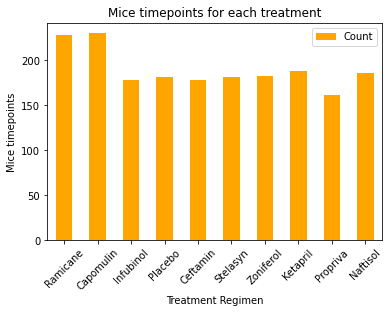

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
x_axis = data_merge['Drug Regimen'].unique()
counts = data_merge['Drug Regimen'].value_counts()
df = pd.DataFrame({"Count": counts}, index=x_axis)

Pandas_bar= df.plot.bar(rot=45, color='orange')
Pandas_bar.set_title('Mice timepoints for each treatment')
Pandas_bar.set_xlabel('Treatment Regimen')
Pandas_bar.set_ylabel('Mice timepoints')
Pandas_bar

<BarContainer object of 10 artists>

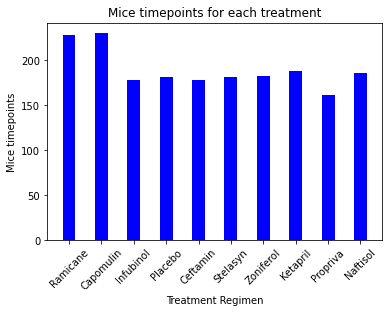

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
pyplot_bar= plt.bar(height=df['Count'], x=x_axis, tick_label=x_axis, color='blue', width=.4)
plt.title('Mice timepoints for each treatment')
plt.xticks(rotation='45')
plt.xlabel('Treatment Regimen')
plt.ylabel('Mice timepoints')
pyplot_bar

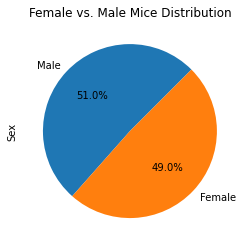

Male      958
Female    922
Name: Sex, dtype: int64

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_pandas_pie = clean_data["Sex"].value_counts()
plt.title("Female vs. Male Mice Distribution")
gender_pandas_pie.plot.pie(autopct= "%1.1f%%",startangle=45)
plt.show()
gender_pandas_pie

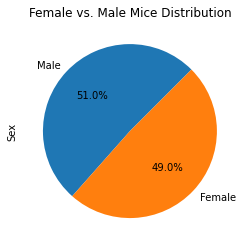

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [50, 50]
plot=gender_pandas_pie.plot.pie(y='Total Count', autopct="%1.1f%%",startangle=45)
plt.title('Female vs. Male Mice Distribution')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint=clean_data.groupby(['Mouse ID'])['Timepoint'].max()
max_timepoint 

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_merge = pd.merge(max_timepoint , clean_data, on=(["Mouse ID","Timepoint"]))
max_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    treatment_reg=max_merge.loc[max_merge["Drug Regimen"] == treatment]
    tumor_vol=treatment_reg['Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_vol)
    

In [15]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartile0 = tumor_vol_data[0].quantile([.25,.5,.75])
lowerq0 = quartile0[0.25]
upperq0 = quartile0[0.75]
IQR0 = upperq0-lowerq0

quartile1 = tumor_vol_data[1].quantile([.25,.5,.75])
lowerq1 = quartile1[0.25]
upperq1 = quartile1[0.75]
IQR1 = upperq1-lowerq1

quartile2 = tumor_vol_data[2].quantile([.25,.5,.75])
lowerq2 = quartile2[0.25]
upperq2 = quartile2[0.75]
IQR2 = upperq2-lowerq2

quartile3 = tumor_vol_data[3].quantile([.25,.5,.75])
lowerq3 = quartile3[0.25]
upperq3 = quartile3[0.75]
IQR3 = upperq3-lowerq3

In [16]:
# Determine outliers using upper and lower bounds
lower_bound0 = lowerq0 - (1.5*IQR0)
upper_bound0 = upperq0 + (1.5*IQR0)

lower_bound1 = lowerq1 - (1.5*IQR1)
upper_bound1 = upperq1 + (1.5*IQR1)

lower_bound2 = lowerq2 - (1.5*IQR2)
upper_bound2 = upperq2 + (1.5*IQR2)

lower_bound3 = lowerq3 - (1.5*IQR3)
upper_bound3 = upperq3 + (1.5*IQR3)

print(f"{treatments[0]} - values below {lower_bound0} and above {upper_bound0} could be outliers")
print(f"{treatments[1]} - values below {lower_bound1} and above {upper_bound1} could be outliers")
print(f"{treatments[2]} - values below {lower_bound2} and above {upper_bound2} could be outliers")
print(f"{treatments[3]} - values below {lower_bound3} and above {upper_bound3} could be outliers")

Capomulin - values below 20.70456164999999 and above 51.83201549 could be outliers
Ramicane - values below 17.912664470000003 and above 54.30681135 could be outliers
Infubinol - values below 36.83290494999999 and above 82.74144559000001 could be outliers
Ceftamin - values below 25.355449580000002 and above 87.66645829999999 could be outliers


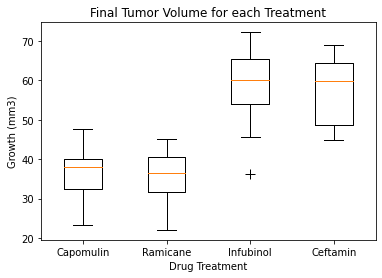

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='+', markerfacecolor='y', markersize=10, linestyle='none')
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume for each Treatment')
ax1.set_ylabel('Growth (mm3)')
ax1.set_xlabel("Drug Treatment")
ax1.boxplot(tumor_vol_data, flierprops = flierprops, labels = treatments)
plt.show()

## Line and Scatter Plots

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Mice_Capomulin=clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
print (Mice_Capomulin)

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10       s185    Capomulin  Female           3          17          0   
11       s185    Capomulin  Female           3          17          5   
12       s185    Capomulin  Female           3          17         10   
13       s185    Capomulin  Female           3          17         15   
14       s185    Capomulin  Female           3          17         20   
...       ...          ...     ...         ...         ...        ...   
440      i557    Capomulin  Female           1          24         45   
1452     r157    Capomulin    Male          22          25          0   
1453     r157    Capomulin    Male          22          25          5   
1454     r157    Capomulin    Male          22          25         10   
1455     r157    Capomulin    Male          22          25         15   

      Tumor Volume (mm3)  Metastatic Sites  
10             45.000000                 0  
11             43.878496         

Text(0, 0.5, 'Tumor Volume')

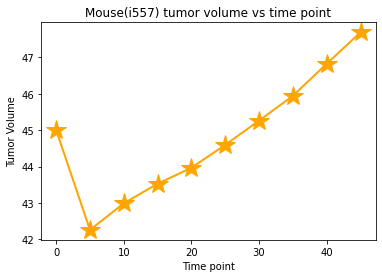

In [19]:
i557_line = Mice_Capomulin[Mice_Capomulin['Mouse ID'] == 'i557']

plt.plot(i557_line['Timepoint'], i557_line['Tumor Volume (mm3)'],linewidth=2,marker="*",markersize=20, color="orange")
plt.title('Mouse(i557) tumor volume vs time point')
plt.xlabel('Time point')
plt.ylabel('Tumor Volume')

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

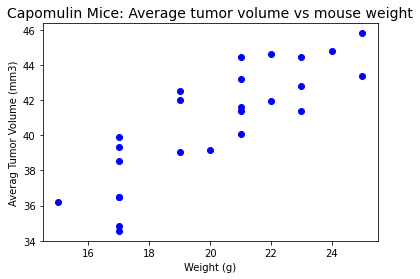

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capo_mean = Mice_Capomulin.groupby(['Mouse ID']).mean()

plt.scatter(Capo_mean['Weight (g)'],Capo_mean['Tumor Volume (mm3)'], color="blue")
plt.title('Capomulin Mice: Average tumor volume vs mouse weight',fontsize=14)
plt.xlabel('Weight (g)',fontsize =10)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize=10)

## Correlation and Regression

The r-squared is: 0.709


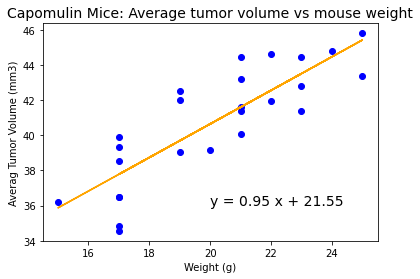

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(Capo_mean['Weight (g)'],Capo_mean['Tumor Volume (mm3)'])
(slope, intercept,rvalue, pvalue, stderr)= linregress(Capo_mean["Weight (g)"],Capo_mean["Tumor Volume (mm3)"])
regress_values=Capo_mean["Weight (g)"]* slope + intercept

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(Capo_mean['Weight (g)'],Capo_mean['Tumor Volume (mm3)'], color="blue")
plt.title('Capomulin Mice: Average tumor volume vs mouse weight',fontsize=14)
plt.xlabel('Weight (g)',fontsize =10)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize=10)

plt.plot(Capo_mean["Weight (g)"], regress_values, color='orange')
plt.annotate(line_eq,(20,36), fontsize=14)
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()